<a href="https://colab.research.google.com/github/Deptage/data_mining_project/blob/main/src/Data_Mining_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining - Project

Jupyter notebook for data mining project.

## Predicting property prices using location attributes & characteristics

#### Pulling the datasets

In [1]:
!pip install gdown -q
!sudo apt-get install tree -q

import os
from pathlib import Path

data_dir = Path('data')
data_dir.mkdir(exist_ok=True)

folder_url = 'https://drive.google.com/drive/folders/1vgj_pa2kw-vlT5XmC_Yft7cJAASd_xh7'

!gdown --folder {folder_url} -O {data_dir}

print("\nDownloaded files:")
!tree {data_dir}


Reading package lists...
Building dependency tree...
Reading state information...
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 30 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 1s (84.7 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tree.
(Reading database ... 126213 files and directories currently installed.)
Preparing

In [2]:
import pandas as pd

In [23]:
# chp = pd.read_csv('data/california-housing-prices.csv')
# hd = pd.read_csv('data/housedata.csv')
# melb = pd.read_csv('data/melbourne-housing-full.csv')
# nyc = pd.read_csv('data/nyc-rolling-sales.csv')
# red = pd.read_csv('data/real-estate-dataset.csv')
# repp = pd.read_csv('data/real-estate-price-prediction.csv')
ured = pd.read_csv('data/usa-real-estate-dataset.csv')

#### 1. Entry data exploration

Let's take a glance at data that is available in the datasets

In [24]:
def print_dataset_overview(dataset, dataset_name):
  print()
  print('============================')
  print(dataset_name)
  print('============================')
  print('Attributes')
  print(dataset.columns)
  print()
  print('Number of rows')
  print(dataset.shape[0])
  print()
  print('Number of columns')
  print(dataset.shape[1])
  print()
  print('First 5 rows')
  print(dataset.head())
  print()
  print('Info')
  print(dataset.info())
  print()
  print('Describe')
  print(dataset.describe())

In [25]:
print_dataset_overview(ured, 'USA Real Estate Dataset')
# print_dataset_overview(chp, 'California Housing Prices')
# print_dataset_overview(hd, 'House Data')
# print_dataset_overview(melb, 'Melbourne Housing Full')
# print_dataset_overview(nyc, 'NYC Rolling Sales')
# print_dataset_overview(repp, 'Real Estate Price Prediction')


USA Real Estate Dataset
Attributes
Index(['brokered_by', 'status', 'price', 'bed', 'bath', 'acre_lot', 'street',
       'city', 'state', 'zip_code', 'house_size', 'prev_sold_date'],
      dtype='object')

Number of rows
2226382

Number of columns
12

First 5 rows
   brokered_by    status     price  bed  bath  acre_lot     street  \
0     103378.0  for_sale  105000.0  3.0   2.0      0.12  1962661.0   
1      52707.0  for_sale   80000.0  4.0   2.0      0.08  1902874.0   
2     103379.0  for_sale   67000.0  2.0   1.0      0.15  1404990.0   
3      31239.0  for_sale  145000.0  4.0   2.0      0.10  1947675.0   
4      34632.0  for_sale   65000.0  6.0   2.0      0.05   331151.0   

         city        state  zip_code  house_size prev_sold_date  
0    Adjuntas  Puerto Rico     601.0       920.0            NaN  
1    Adjuntas  Puerto Rico     601.0      1527.0            NaN  
2  Juana Diaz  Puerto Rico     795.0       748.0            NaN  
3       Ponce  Puerto Rico     731.0      1800.0  

#### Attribute selection

From the usa-real-estate-dataset.csv we can see that most likey, 'brokered_by' and 'status' attributes will be unsignificant and redundant, since it encodes the agency that sold the property and indicates the sale status, which is not the aim of this analysis. Even though 'prev_sold_date' also describes the sale of the property, we will leave it be, since it indicates, if the property was sold before.

Also, the 'street' attribute is way too specific. For determining the location, 'state','city' and 'zip_code' should be sufficient.

In summary, the attributes we selected for exploratory analysis are:
- price (the attribute we are trying to predict)
- bed (the number of bedrooms)
- bath (the number of bathrooms)
- acre_lot (total lot size)
- city
- state
- zip_code
- house_size
- prev_sold_date

In [81]:
ured_filtered = ured.drop(columns=['brokered_by', 'street', 'status'])

In [82]:
print_dataset_overview(ured_filtered, 'USA Real Estate Dataset - filtered')


USA Real Estate Dataset - filtered
Attributes
Index(['price', 'bed', 'bath', 'acre_lot', 'city', 'state', 'zip_code',
       'house_size', 'prev_sold_date'],
      dtype='object')

Number of rows
2226382

Number of columns
9

First 5 rows
      price  bed  bath  acre_lot        city        state  zip_code  \
0  105000.0  3.0   2.0      0.12    Adjuntas  Puerto Rico     601.0   
1   80000.0  4.0   2.0      0.08    Adjuntas  Puerto Rico     601.0   
2   67000.0  2.0   1.0      0.15  Juana Diaz  Puerto Rico     795.0   
3  145000.0  4.0   2.0      0.10       Ponce  Puerto Rico     731.0   
4   65000.0  6.0   2.0      0.05    Mayaguez  Puerto Rico     680.0   

   house_size prev_sold_date  
0       920.0            NaN  
1      1527.0            NaN  
2       748.0            NaN  
3      1800.0            NaN  
4         NaN            NaN  

Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 9 columns):
 #   Column          Dtype  


#### Wskazanie atrybutów celu

In [83]:
target = ured_filtered['price']

#### Wskazanie rodzajów atrybutów

In [84]:
ured_filtered

,price,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date
0,105000.0,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,80000.0,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,67000.0,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,145000.0,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN
4,65000.0,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2226377,359900.0,4.0,2.0,0.33,Richland,Washington,99354.0,3600.0,2022-03-25
2226378,350000.0,3.0,2.0,0.10,Richland,Washington,99354.0,1616.0,2022-03-25
2226379,440000.0,6.0,3.0,0.50,Richland,Washington,99354.0,3200.0,2022-03-24
2226380,179900.0,2.0,1.0,0.09,Richland,Washington,99354.0,933.0,2022-03-24


In [85]:
ured_filtered.describe()

,price,bed,bath,acre_lot,zip_code,house_size
count,2.224841e+06,1.745065e+06,1.714611e+06,1.900793e+06,2.226083e+06,1.657898e+06
mean,5.241955e+05,3.275841e+00,2.496440e+00,1.522303e+01,5.218668e+04,2.714471e+03
std,2.138893e+06,1.567274e+00,1.652573e+00,7.628238e+02,2.895408e+04,8.081635e+05
min,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
25%,1.650000e+05,3.000000e+00,2.000000e+00,1.500000e-01,2.961700e+04,1.300000e+03
50%,3.250000e+05,3.000000e+00,2.000000e+00,2.600000e-01,4.838200e+04,1.760000e+03
75%,5.500000e+05,4.000000e+00,3.000000e+00,9.800000e-01,7.807000e+04,2.413000e+03
max,2.147484e+09,4.730000e+02,8.300000e+02,1.000000e+05,9.999900e+04,1.040400e+09


price - to nasz target - ciągła wartość

bed - wartość dyskretna

bath - wartość dyskretna

acre_lot - wartość ciągła

city - wartość dyskretna, nominalna

state - dysk. nominalna

zip code - dysk, nominalna

house size - ciągła

prev_sold_date - data, dyskretna


#### Handling outliers

Before handling null values, we must handle the outliers. Since handling null values takes into account using means, modes etc., this step is essential to ensure the proper learning of the final model.

Before we will handle anything, we will draw box plots of the values included in the columns.

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_boxplot(dataset: pd.DataFrame, column: str):
    """
    Rysuje boxplot dla jednej kolumny w podanym DataFrame.
    """
    plt.figure(figsize=(6, 6))
    sns.set(style="whitegrid")

    sns.boxplot(y=dataset[column].dropna())
    plt.yscale('log')
    plt.title(f'Boxplot: {column}')
    plt.ylabel(column)
    plt.tight_layout()
    plt.show()

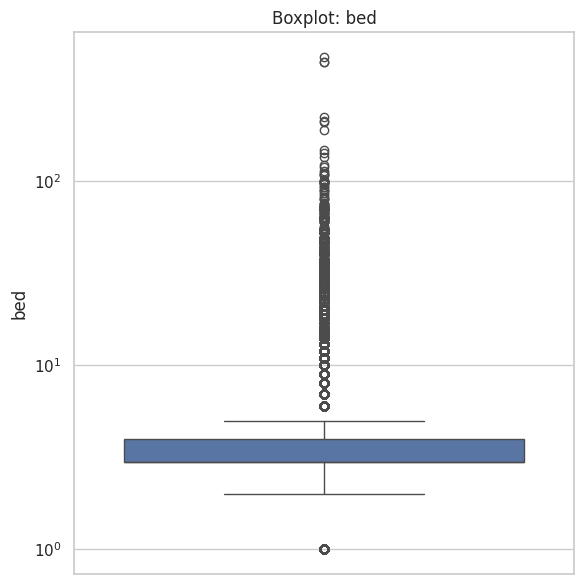

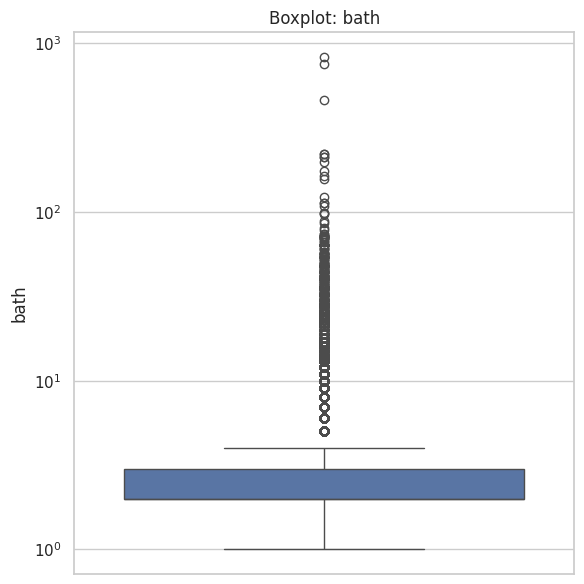

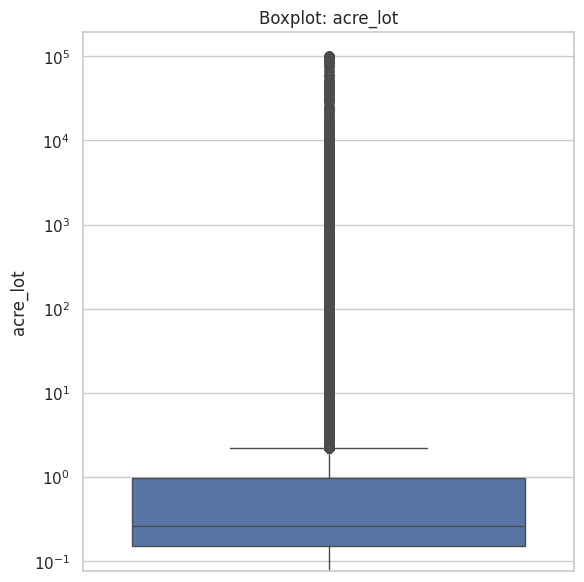

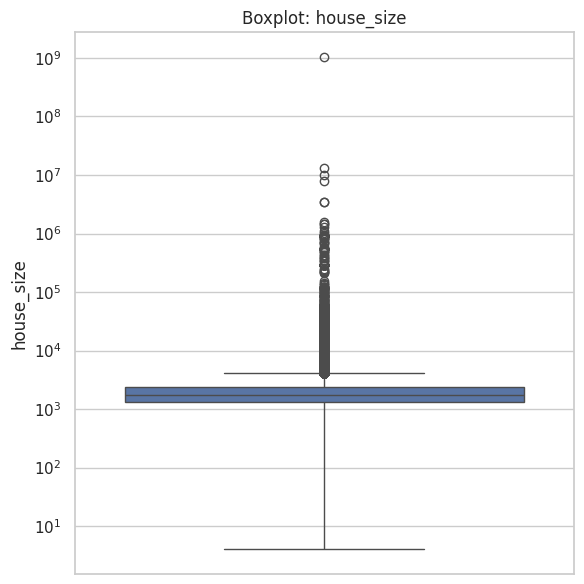

In [87]:
plot_boxplot(ured_filtered, 'bed')
plot_boxplot(ured_filtered, 'bath')
plot_boxplot(ured_filtered, 'acre_lot')
plot_boxplot(ured_filtered, 'house_size')

We can see that there are a lot of entries with large numbers of bedrooms and bathrooms. We can assume, that it means, that it can be a large block of flats, counted as one real estate. To verify that, we can draw a scatterplot to look for outliers.

In [88]:
def plot_scatterplot(dataset: pd.DataFrame, x_col: str, y_col: str):
    plt.figure(figsize=(8, 6))
    sns.set(style="whitegrid")

    sns.scatterplot(data=dataset, x=x_col, y=y_col)
    plt.title(f'Scatterplot: {x_col} vs {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.tight_layout()
    plt.show()

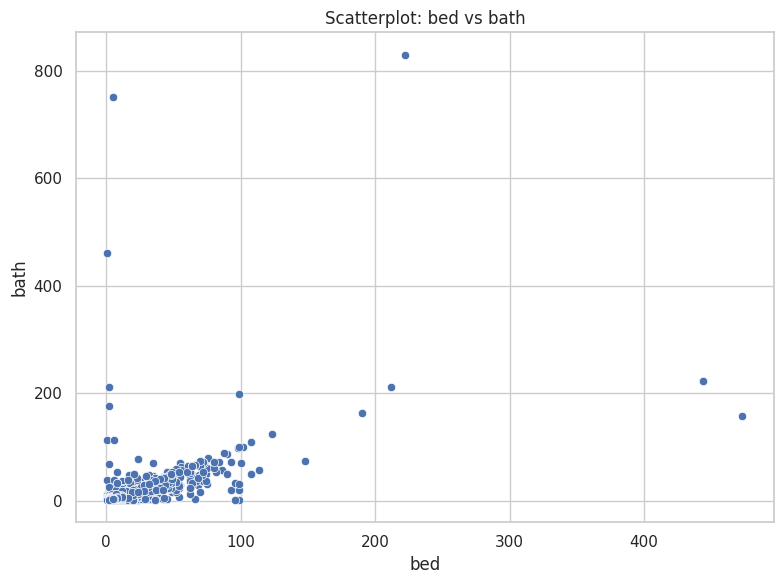

In [89]:
plot_scatterplot(ured_filtered, 'bed', 'bath')

As we can see, the number of bedrooms slightly correlates with the number of bathrooms. Since situations, where there is a singular bathroom (or even none) for a lot of bedrooms, are still common in real life, we can assume, that an outlier will be a situation, where there are more than 2 bathrooms for every bedroom.

In [92]:
ured_filtered = ured_filtered[
    (ured_filtered['bath'] < 2 * ured_filtered['bed']) |
     (ured_filtered['bed'].isna()) |
      (ured_filtered['bath'].isna()) ]

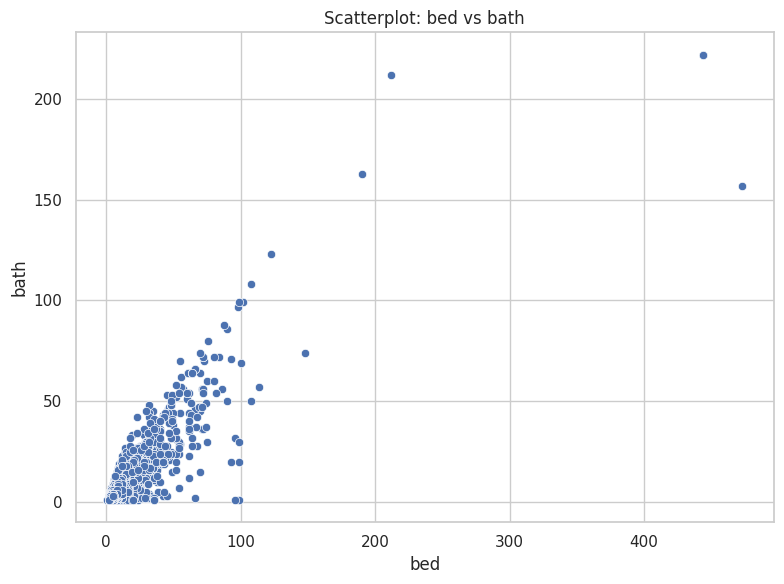

In [93]:
plot_scatterplot(ured_filtered, 'bed', 'bath')

Now, the bathroom-bedroom situation looks a lot better. The acre_lot makes sense, since there are real-estates e.g. in the countryside, which lots are very large (ranches, for example, can span for tens of squared kilometers).

We can do the same for house_size as we did for bathrooms, since it represents the living space in square feet. We will compare the house_size and plot_acres on a scatter plot to weed out the outliers.

Keep in mind that one acre is 43560 square feet.

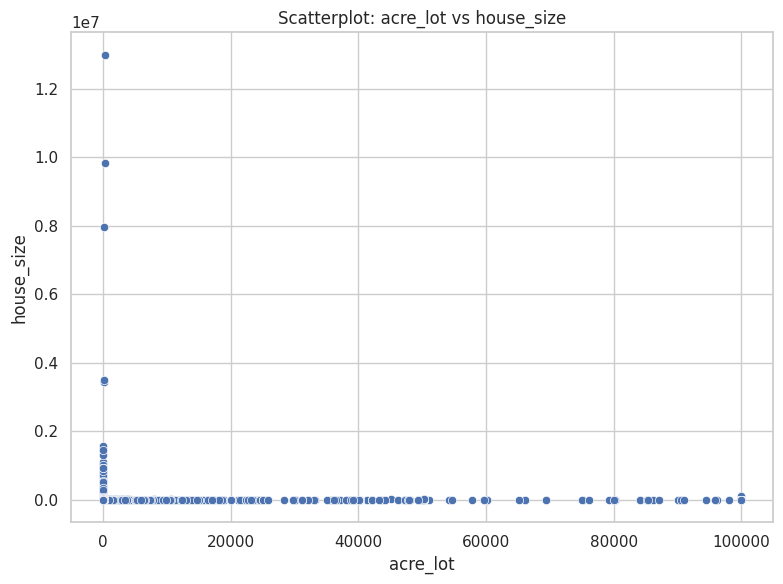

In [94]:
plot_scatterplot(ured_filtered, 'acre_lot', 'house_size')

As we can see, there aren't large discrepancies and oubvious outliers seen on this graph. The entries with house_size close to 0 make sense, especially for rural properties with large lots. Furthermore, entries with acre_lot close to 0 also make sense, since it can mean, that entry is based on the measures of a skyscraper or a block of flats. To be sure, 1000000 square feet is about 90000 square meters, which is still absurdly large, and we can qualify this as an outlier

Since all data in acre_lot makes sense, and there can be outliers in house_size, we will delete entries that are in the top 0.1% of the house_size.

In [95]:
def remove_outliers(dataset: pd.DataFrame, x_col: str):
    p99 = dataset[x_col].quantile(0.999)
    print(p99)
    filtered_data = dataset[
        (dataset[x_col] <= p99)
    ]

    return filtered_data

In [96]:
ured_outliers_fixed = remove_outliers(ured_filtered, 'house_size')

14295.51200000057


In [97]:
ured_filtered = ured_outliers_fixed

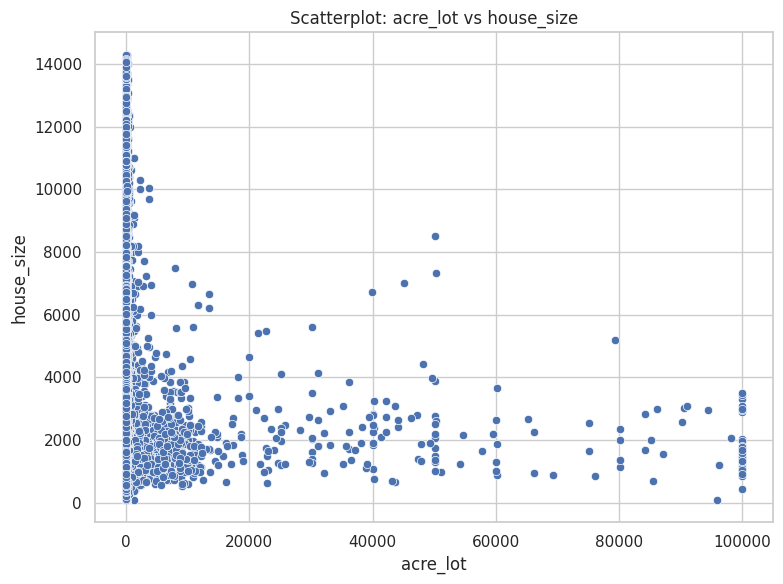

In [98]:
plot_scatterplot(ured_filtered, 'acre_lot', 'house_size')

Now, we will filter the dates. For every not null prev_sold_date, we will filter out the data between 1900 and 2024 (the year the dataset was created).

In [102]:
ured_filter_date = ured_filtered

In [105]:
# prompt: Now, we will filter the dates. For every not null prev_sold_date, we will filter out the data between 1900 and 2024 (the year the dataset was created). There are dates within that will crash the system, like year 3065, so work on strings. The prev_sold_date is either NaN or in format of YYYY-MM-DD.

# Filter dates between 1900 and 2024
ured_filter_date = ured_filter_date[
    (ured_filter_date['prev_sold_date'].isnull()) |
    (ured_filter_date['prev_sold_date']
     .str.slice(0, 4)
     .apply(pd.to_numeric, errors='coerce')  # Convert to numeric, invalid parsing will become NaN
     .between(1900, 2025))
]


In [108]:
ured_filtered = ured_filter_date

#### Clearing empty values

Firstly, let's inspect the columns for empty values

In [109]:
def count_nans(dataset):
  for column in dataset.columns:
    print(f'{column}: {dataset[column].isna().sum()}')

In [110]:
count_nans(ured_filtered)

price: 0
bed: 0
bath: 0
acre_lot: 0
city: 0
state: 0
zip_code: 0
house_size: 0
prev_sold_date: 383836


Handling NaN values:

- in 'price' - entries will be dropped
- in 'bed' and 'bath' - mode
- in 'acre_lot' - median
- in 'city', 'state', 'zip' - entries will be dropped
- in 'house_size' - median

- for 'prev_sold_date' we will introduce two new variables, that indicate, if the property has been sold before, and years since the last selling date, since it could affect the final price.

In [111]:
ured_filtered = ured_filtered.dropna(subset=['price', 'city', 'state', 'zip_code'])
ured_filtered = ured_filtered.fillna({'bed': ured_filtered['bed'].mode()[0],
                                      'bath': ured_filtered['bath'].mode()[0],
                                      'acre_lot': ured_filtered['acre_lot'].median(),
                                      'house_size': ured_filtered['house_size'].median()})

Now, we will handle 'prev_sold_date'. We introduce a dummy attribute 'sold_before', which will be of binary type. If 'prev_sold_date' is NaN, then we assign 0 to 'sold_before', meaning, that the property hasn't been sold before. Otherwise, we assign 1. Then, we will drop 'sold_before' column.

Also, we will introduce another dummy variable of numerical discreet type, called 'years_since_sold' that will help us determine the potential house age. The data was collected in 2024, and that will be our reference date for calculating the age.

In [112]:
ured_filtered['sold_before'] = 0
ured_filtered.loc[ured_filtered['prev_sold_date'].notna(), 'sold_before'] = 1

In [113]:
ured_filtered['years_since_sold'] = 0
ured_filtered.loc[ured_filtered['prev_sold_date'].notna(), 'years_since_sold'] = 2024 - pd.to_datetime(ured_filtered.loc[ured_filtered['prev_sold_date'].notna(), 'prev_sold_date']).dt.year

In [116]:
ured_filtered = ured_filtered.drop(columns=['prev_sold_date'])
ured_filtered.head()

,price,bed,bath,acre_lot,city,state,zip_code,house_size,sold_before,years_since_sold
0,105000.0,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,0,0
1,80000.0,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,0,0
2,67000.0,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,0,0
3,145000.0,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,0,0
5,179000.0,4.0,3.0,0.46,San Sebastian,Puerto Rico,612.0,2520.0,0,0


Now, we check if there are any NaNs left

In [117]:
count_nans(ured_filtered)

price: 0
bed: 0
bath: 0
acre_lot: 0
city: 0
state: 0
zip_code: 0
house_size: 0
sold_before: 0
years_since_sold: 0


#### Normalization and standardization of data

To correctly standardize the data, we first must draw the distributions of the data.

In [118]:
def draw_histogram(data, num_bins=10, title='Histogram', xlabel='Values', ylabel='Frequency'):
    """
    Draws a histogram from the provided data.

    Parameters:
    - data: list or array of numeric values
    - num_bins: number of bins for the histogram (default is 10)
    - title: title of the plot
    - xlabel: label for the X-axis
    - ylabel: label for the Y-axis
    """
    plt.figure(figsize=(8, 5))
    plt.hist(data, bins=num_bins, edgecolor='black', color='skyblue')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

In [ ]:
draw

In [ ]:
draw_histograms(ured_filtered, ['price', 'bed', 'bath', 'acre_lot', 'house_size', 'years_since_sold'])

KeyboardInterrupt: 